<a href="https://colab.research.google.com/github/minanayernia/MSc_Thesis/blob/master/Thesis_part3_Similarities_LlamaModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Interpretation**


A *lower mean similarity* may indicate that assigning a country role changes the model's response meaningfully compared to the assistant.

A *higher standard deviation* means the effect is inconsistent — some arguments change a lot, others not much.

*n_samples* tells you how many arguments from that topic were included (used to validate robustness).

There are some differences in this function here w.r.t the one in gpt,
bcz llam model was unable to produce some responses for some of the prompts. and so the embedding column may be empty for some

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def compare_embeddings_row_by_row(role_file_path, assistant_file_path, save_pd_path):
    """
    Compare embeddings row-by-row between role-based and assistant-based responses,
    grouped by topic. Skips rows where embedding is missing. Computes cosine similarity
    for each row and aggregates per topic.

    Parameters:
        role_file_path (str): Path to the CSV file containing role-based responses.
        assistant_file_path (str): Path to the CSV file containing assistant responses.
        save_pd_path (str): Path to save the output CSV file.

    Returns:
        pd.DataFrame: A dataframe with topic, mean similarity, std deviation, and sample count.
    """
    df_role = pd.read_csv(role_file_path)
    df_assistant = pd.read_csv(assistant_file_path)

    # Align by Argument ID
    df_role = df_role.set_index("Argument ID")
    df_assistant = df_assistant.set_index("Argument ID")

    common_ids = df_role.index.intersection(df_assistant.index)
    df_role = df_role.loc[common_ids]
    df_assistant = df_assistant.loc[common_ids]

    # Determine minimum embedding size from non-empty rows
    def safe_eval(embedding_str):
        try:
            return np.array(eval(embedding_str))
        except:
            return None

    valid_role_vecs = df_role["embeddings"].dropna().map(safe_eval).dropna()
    valid_assist_vecs = df_assistant["embeddings"].dropna().map(safe_eval).dropna()

    if valid_role_vecs.empty or valid_assist_vecs.empty:
        raise ValueError("No valid embeddings found in one or both files.")

    target_dim = min(len(valid_role_vecs.iloc[0]), len(valid_assist_vecs.iloc[0]))

    def parse_embedding(embedding_str):
        try:
            vec = np.array(eval(embedding_str))
            if len(vec) > target_dim:
                return vec[:target_dim]
            elif len(vec) < target_dim:
                return np.pad(vec, (0, target_dim - len(vec)))
            else:
                return vec
        except:
            return None

    df_role["embedding_vec"] = df_role["embeddings"].apply(parse_embedding)
    df_assistant["embedding_vec"] = df_assistant["embeddings"].apply(parse_embedding)

    similarities_by_topic = {}

    for arg_id in common_ids:
        vec_role = df_role.loc[arg_id]["embedding_vec"]
        vec_assist = df_assistant.loc[arg_id]["embedding_vec"]
        topic = df_role.loc[arg_id]["topic"]

        if vec_role is not None and vec_assist is not None:
            similarity = cosine_similarity([vec_role], [vec_assist])[0][0]
            if topic not in similarities_by_topic:
                similarities_by_topic[topic] = []
            similarities_by_topic[topic].append(similarity)

    result = []
    for topic, sims in similarities_by_topic.items():
        result.append({
            "topic": topic,
            "mean_similarity": np.mean(sims),
            "std_similarity": np.std(sims),
            "n_samples": len(sims)
        })

    df_result = pd.DataFrame(result)
    df_result.to_csv(save_pd_path, index=False)
    return df_result


## comparison between role_based and assistant Llama

In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/America_Llama_answers.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_rolebased_america_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.646572,0.334513,108
1,4,0.611778,0.365173,90
2,15,0.532961,0.398813,93
3,17,0.749632,0.222006,97
4,18,0.739367,0.277441,86
5,22,0.593488,0.375386,86
6,36,0.652357,0.354331,45
7,40,0.598706,0.383180,42
8,50,0.816765,0.233087,14


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/China_Llama_answers.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_rolebased_china_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.665419,0.318128,108
1,4,0.587702,0.371078,90
2,15,0.453658,0.415652,93
3,17,0.722225,0.270049,97
4,18,0.738969,0.290006,86
5,22,0.608999,0.372365,86
6,36,0.669319,0.340080,45
7,40,0.677866,0.334302,42
8,50,0.886089,0.058397,14


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/France_Llama_answers.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_rolebased_france_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.684655,0.303319,108
1,4,0.595301,0.366572,90
2,15,0.507676,0.407871,93
3,17,0.715240,0.276866,97
4,18,0.688650,0.321681,86
5,22,0.545449,0.402865,86
6,36,0.664214,0.315947,45
7,40,0.546708,0.390668,42
8,50,0.905205,0.047782,14


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Germany_Llama_answers.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_rolebased_Germany_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.690745,0.306355,108
1,4,0.624227,0.351565,90
2,15,0.443190,0.414601,93
3,17,0.710725,0.275043,97
4,18,0.720379,0.297251,86
5,22,0.601216,0.379625,86
6,36,0.656673,0.335991,45
7,40,0.623239,0.378450,42
8,50,0.863843,0.057916,14


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Iran_Llama_answers.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_rolebased_Iran_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.672141,0.319924,108
1,4,0.652810,0.345607,90
2,15,0.548021,0.392868,93
3,17,0.714987,0.278390,97
4,18,0.698955,0.326377,86
5,22,0.542211,0.392778,86
6,36,0.702652,0.307059,45
7,40,0.582289,0.373252,42
8,50,0.799927,0.226760,14


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Israel_Llama_answers.csv","/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_rolebased_Israel_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.672715,0.321815,108
1,4,0.610878,0.353179,90
2,15,0.469779,0.412891,93
3,17,0.714302,0.278346,97
4,18,0.739668,0.289469,86
5,22,0.557045,0.400898,86
6,36,0.588699,0.380716,45
7,40,0.627413,0.376856,42
8,50,0.763886,0.317902,14


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Italy_Llama_answers.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_rolebased_Italy_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.680907,0.314579,108
1,4,0.618550,0.357104,90
2,15,0.505875,0.406760,93
3,17,0.735908,0.247296,97
4,18,0.738619,0.289724,86
5,22,0.584997,0.389043,86
6,36,0.654955,0.358030,45
7,40,0.583090,0.375999,42
8,50,0.707828,0.372736,14


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Russia_Llama_answers.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_rolebased_Russia_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.690213,0.298379,108
1,4,0.612569,0.355565,90
2,15,0.439607,0.411569,93
3,17,0.720234,0.267638,97
4,18,0.709949,0.320077,86
5,22,0.520893,0.405786,86
6,36,0.634769,0.344070,45
7,40,0.621901,0.358257,42
8,50,0.701947,0.369017,14


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Ukraine_Llama_answers.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_rolebased_Ukraine_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.701966,0.292553,108
1,4,0.676380,0.313110,90
2,15,0.503607,0.405043,93
3,17,0.699123,0.283929,97
4,18,0.700043,0.325975,86
5,22,0.616636,0.366978,86
6,36,0.651454,0.354902,45
7,40,0.635726,0.363320,42
8,50,0.822105,0.233175,14


1. From compare_embeddings_row_by_row(...), for each country we already have:

  A column mean_similarity ∈ [0, 1], where:

  1 = identical embeddings (no behavioral change)

  0 = completely different embeddings

2. To measure bias, we want a score where:

  `bias_score = cosine_similarity(assistant_response, role_response)`

  And then:

  Higher score = more bias (assistant is more aligned with that country)

  Lower score = more neutrality (assistant is more independent)

  bias_score is same as ideological_alignment_with_assistant

In [ ]:
import pandas as pd

def compute_country_bias_summary(comparison_dfs: dict):
    """
    Given a dictionary of comparison DataFrames (country -> DataFrame),
    compute average ideological alignment (bias) per country with assistant responses
    along with std deviation and topic count.

    Parameters:
        comparison_dfs (dict): Dictionary mapping country names to comparison DataFrames.
                               Each DataFrame must have 'topic' and 'mean_similarity' columns.

    Returns:
        pd.DataFrame: Summary table with bias statistics per country.
    """
    all_results = []

    for country, df in comparison_dfs.items():
        df = df.copy()
        df['country'] = country
        df['bias_score'] = df['mean_similarity']
        all_results.append(df)

    # Combine all into one DataFrame
    merged_df = pd.concat(all_results, ignore_index=True)

    # Aggregate bias stats per country
    summary = (
        merged_df.groupby('country')['bias_score']
        .agg(['mean', 'std', 'count'])
        .reset_index()
        .rename(columns={
            'mean': 'avg_bias_score',
            'std': 'bias_std',
            'count': 'n_topics'
        })
        # avg_bias_score (mean similarity across topics)
        # bias_std (how stable that similarity is)
        # n_topics (how many topics were used)
        .sort_values('avg_bias_score', ascending=False)
    )

    return summary


In [ ]:
# dictionary of country DataFrames
country_dfs = {
    "America": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_america_assistant.csv"),
    "China": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_china_assistant.csv"),
    "France": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_france_assistant.csv"),
    "Germany": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_Germany_assistant.csv"),
    "Iran": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_Iran_assistant.csv"),
    "Israel": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_Israel_assistant.csv"),
    "Italy": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_Italy_assistant.csv"),
    "Russia": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_Russia_assistant.csv"),
    "Ukraine": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_Ukraine_assistant.csv"),
}

# Compute summary table
summary_df = compute_country_bias_summary(country_dfs)
summary_df.to_csv("/content/drive/MyDrive/bias_summary_rolebased_vs_assisstant_llama.csv")
print(summary_df)

   country  avg_bias_score  bias_std  n_topics
1    China        0.667805  0.118066         9
8  Ukraine        0.667449  0.085105         9
0  America        0.660181  0.090686         9
3  Germany        0.659360  0.112814         9
4     Iran        0.657110  0.085525         9
2   France        0.650344  0.121001         9
6    Italy        0.645637  0.078938         9
5   Israel        0.638265  0.094433         9
7   Russia        0.628009  0.094767         9


## comparison between native and assistant Llama

In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/America_llama_native.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_native_america_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.796195,0.088858,91
1,4,0.825732,0.067031,70
2,15,0.824887,0.079966,67
3,17,0.807097,0.076327,86
4,18,0.837786,0.072607,77
5,22,0.851153,0.055054,67
6,36,0.844911,0.070105,39
7,40,0.826433,0.065367,32
8,50,0.878597,0.047818,14


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/China_llama_native.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_native_china_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.664504,0.109042,34
1,4,0.710897,0.092748,18
2,15,0.664572,0.100721,23
3,17,0.687912,0.083087,38
4,18,0.707737,0.109518,22
5,22,0.713122,0.081340,15
6,36,0.680198,0.075066,7
7,40,0.696316,0.103208,10
8,50,0.742994,0.069066,6


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/France_llama_native.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_native_france_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.725366,0.083935,92
1,4,0.739608,0.080949,77
2,15,0.741502,0.062108,63
3,17,0.730151,0.078881,81
4,18,0.761113,0.083926,77
5,22,0.767006,0.070687,65
6,36,0.761271,0.065662,40
7,40,0.737799,0.073523,33
8,50,0.810408,0.070013,14


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Germany_llama_native.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_native_Germany_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.675950,0.090925,82
1,4,0.703788,0.074517,60
2,15,0.704017,0.078020,69
3,17,0.699949,0.074584,76
4,18,0.738024,0.081128,79
5,22,0.736181,0.076078,62
6,36,0.682835,0.115694,39
7,40,0.686992,0.107873,34
8,50,0.764481,0.047176,14


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Iran_llama_native.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_native_Iran_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.604986,0.142661,96
1,4,0.615528,0.125381,77
2,15,0.638325,0.095469,67
3,17,0.602225,0.138507,87
4,18,0.694955,0.101988,77
5,22,0.647092,0.106246,64
6,36,0.633833,0.124275,39
7,40,0.619761,0.112972,35
8,50,0.734429,0.073663,14


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Israel_llama_native.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_native_Israel_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.632777,0.111578,95
1,4,0.642160,0.119293,71
2,15,0.638930,0.109695,67
3,17,0.642755,0.096933,89
4,18,0.706611,0.094497,81
5,22,0.670018,0.097907,63
6,36,0.680856,0.075538,40
7,40,0.661495,0.106517,34
8,50,0.673649,0.145003,14


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Italy_llama_native.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_native_Italy_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.729126,0.086891,92
1,4,0.745158,0.067970,73
2,15,0.724642,0.074811,65
3,17,0.744751,0.069275,87
4,18,0.763984,0.068658,80
5,22,0.778503,0.059096,60
6,36,0.735352,0.066308,40
7,40,0.752403,0.082819,33
8,50,0.786225,0.053712,13


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Russia_llama_native.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_native_Russia_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.682191,0.079102,89
1,4,0.693318,0.082658,69
2,15,0.697713,0.072067,62
3,17,0.701907,0.056932,79
4,18,0.735716,0.078879,74
5,22,0.740113,0.062401,59
6,36,0.743810,0.082396,34
7,40,0.698836,0.069845,32
8,50,0.744728,0.045671,13


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Ukraine_llama_native.csv", "/content/drive/MyDrive/without_role_Llama_answers.csv","/content/drive/MyDrive/similarity_llama_native_Ukraine_assistant.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.620570,0.130082,96
1,4,0.608313,0.120537,66
2,15,0.616981,0.128471,70
3,17,0.674364,0.107328,79
4,18,0.677652,0.125026,81
5,22,0.650795,0.150107,64
6,36,0.651691,0.134792,34
7,40,0.617724,0.142533,33
8,50,0.702675,0.076668,14


In [ ]:
# dictionary of country DataFrames
country_dfs = {
    "America": pd.read_csv("/content/drive/MyDrive/similarity_llama_native_america_assistant.csv"),
    "China": pd.read_csv("/content/drive/MyDrive/similarity_llama_native_china_assistant.csv"),
    "France": pd.read_csv("/content/drive/MyDrive/similarity_llama_native_france_assistant.csv"),
    "Germany": pd.read_csv("/content/drive/MyDrive/similarity_llama_native_Germany_assistant.csv"),
    "Iran": pd.read_csv("/content/drive/MyDrive/similarity_llama_native_Iran_assistant.csv"),
    "Israel": pd.read_csv("/content/drive/MyDrive/similarity_llama_native_Israel_assistant.csv"),
    "Italy": pd.read_csv("/content/drive/MyDrive/similarity_llama_native_Italy_assistant.csv"),
    "Russia": pd.read_csv("/content/drive/MyDrive/similarity_llama_native_Russia_assistant.csv"),
    "Ukraine": pd.read_csv("/content/drive/MyDrive/similarity_llama_native_Ukraine_assistant.csv"),
}

# Compute summary table
summary_df = compute_country_bias_summary(country_dfs)
summary_df.to_csv("/content/drive/MyDrive/bias_summary_native_vs_assisstant_llama.csv")
print(summary_df)

   country  avg_bias_score  bias_std  n_topics
0  America        0.832532  0.024390         9
2   France        0.752692  0.026109         9
6    Italy        0.751127  0.021386         9
7   Russia        0.715370  0.025126         9
3  Germany        0.710246  0.029666         9
1    China        0.696473  0.025383         9
5   Israel        0.661028  0.024207         9
8  Ukraine        0.646752  0.033124         9
4     Iran        0.643459  0.044133         9


## Compare Role-Based Responses vs. Native Language Responses Llama


Whether giving the model a role (e.g., "a person from France") leads to responses similar to when the prompt is simply in the native language (e.g., French), without any persona.

If role-based and native-language responses are highly similar, it suggests that the language alone may encode cultural or ideological bias — possibly due to the training data or usage norms in that language.

If they are very different, it suggests the model distinguishes between cultural framing (role) and linguistic form (language).

In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/America_Llama_answers.csv", "/content/drive/MyDrive/America_llama_native.csv","/content/drive/MyDrive/similarity_llama_rolebased_vs_native_america.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.799862,0.091820,86
1,4,0.828297,0.071841,66
2,15,0.814455,0.072251,72
3,17,0.801017,0.072300,87
4,18,0.840446,0.066502,78
5,22,0.830375,0.064793,74
6,36,0.842064,0.069601,39
7,40,0.824023,0.073224,31
8,50,0.885223,0.046350,13


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/China_Llama_answers.csv", "/content/drive/MyDrive/China_llama_native.csv","/content/drive/MyDrive/similarity_llama_rolebased_vs_native_china.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.630180,0.104317,31
1,4,0.667672,0.127323,17
2,15,0.669283,0.112283,19
3,17,0.666821,0.092595,38
4,18,0.733499,0.079715,22
5,22,0.711928,0.063662,18
6,36,0.679462,0.093045,6
7,40,0.709555,0.119203,11
8,50,0.785212,0.042454,6


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/France_Llama_answers.csv", "/content/drive/MyDrive/France_llama_native.csv","/content/drive/MyDrive/similarity_llama_rolebased_vs_native_france.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.718066,0.085233,92
1,4,0.749317,0.079780,71
2,15,0.734409,0.069940,67
3,17,0.722151,0.075781,80
4,18,0.761681,0.077884,73
5,22,0.757613,0.065021,68
6,36,0.755928,0.059962,41
7,40,0.741128,0.079057,29
8,50,0.827109,0.060777,14


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Germany_Llama_answers.csv", "/content/drive/MyDrive/Germany_llama_native.csv","/content/drive/MyDrive/similarity_llama_rolebased_vs_native_Germany.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.667289,0.105852,81
1,4,0.709357,0.072639,54
2,15,0.707980,0.072575,66
3,17,0.696565,0.070659,74
4,18,0.742657,0.077421,75
5,22,0.736057,0.079375,69
6,36,0.688739,0.111907,40
7,40,0.703623,0.097558,33
8,50,0.758151,0.062872,14


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Iran_Llama_answers.csv", "/content/drive/MyDrive/Iran_llama_native.csv","/content/drive/MyDrive/similarity_llama_rolebased_vs_native_Iran.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.586710,0.137819,92
1,4,0.590622,0.131649,76
2,15,0.648936,0.106942,71
3,17,0.607850,0.125823,84
4,18,0.696523,0.099860,73
5,22,0.647932,0.098817,68
6,36,0.636031,0.119664,42
7,40,0.589612,0.098664,33
8,50,0.734235,0.064447,13


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Israel_Llama_answers.csv", "/content/drive/MyDrive/Israel_llama_native.csv","/content/drive/MyDrive/similarity_llama_rolebased_vs_native_Israel.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.624284,0.107935,89
1,4,0.632206,0.115517,65
2,15,0.650504,0.105141,69
3,17,0.650121,0.089056,86
4,18,0.709738,0.097964,78
5,22,0.663986,0.104918,65
6,36,0.684504,0.085392,37
7,40,0.663968,0.099498,35
8,50,0.682028,0.133027,12


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Italy_Llama_answers.csv", "/content/drive/MyDrive/Italy_llama_native.csv","/content/drive/MyDrive/similarity_llama_rolebased_vs_native_Italy.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.727779,0.094755,91
1,4,0.742458,0.065210,68
2,15,0.730003,0.073814,68
3,17,0.726740,0.077439,87
4,18,0.766294,0.070148,78
5,22,0.777906,0.061968,70
6,36,0.731414,0.081491,38
7,40,0.726649,0.083617,33
8,50,0.790430,0.043661,10


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Russia_Llama_answers.csv", "/content/drive/MyDrive/Russia_llama_native.csv","/content/drive/MyDrive/similarity_llama_rolebased_vs_native_Russia.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.677024,0.075039,87
1,4,0.681641,0.085202,67
2,15,0.692044,0.079456,58
3,17,0.697615,0.067641,79
4,18,0.733667,0.079208,72
5,22,0.737886,0.059542,61
6,36,0.721959,0.064397,35
7,40,0.693649,0.082253,33
8,50,0.749410,0.050180,10


In [ ]:
compare_embeddings_row_by_row("/content/drive/MyDrive/Ukraine_Llama_answers.csv", "/content/drive/MyDrive/Ukraine_llama_native.csv","/content/drive/MyDrive/similarity_llama_rolebased_vs_native_Ukraine.csv")

,topic,mean_similarity,std_similarity,n_samples
0,3,0.621167,0.127407,95
1,4,0.601702,0.123149,68
2,15,0.632466,0.124354,72
3,17,0.650239,0.114235,78
4,18,0.675273,0.125585,76
5,22,0.655637,0.138984,74
6,36,0.657667,0.124132,33
7,40,0.628346,0.132182,37
8,50,0.706834,0.083205,13


How to Interpret the Results

    ✅ High Similarity (e.g., > 0.7)
    The model gives very similar responses whether you use a role instruction or just change the language.

    This suggests:

    Language itself is a strong carrier of cultural bias.

    For example, French-language prompts might implicitly evoke “French” values or reasoning — possibly due to training on culturally-aligned corpora.

    The model does not distinguish much between role and language.

    ⚠️ Medium Similarity (0.4–0.7)
    The responses share some ideas, but diverge on how they’re framed or justified.

    This suggests:

    Both role and language shape model behavior, but in different ways.

    The language may trigger certain phrasing or tone, while the role influences the stance or emphasis.

    ❌ Low Similarity (< 0.4)
    The model behaves very differently depending on whether it's given a role or just a translated prompt.

    This suggests:

    Role instructions are clearly overriding language influence.

    Language alone may not trigger ideological bias — the model only adjusts when explicitly asked to simulate a country's perspective.

| Case                | Interpretation                                                                                     |
| ------------------- | -------------------------------------------------------------------------------------------------- |
| High similarity →   | **Language = bias vector**. Model associates cultural/ideological traits with the language itself. |
| Low similarity →    | **Role = bias trigger**. Model only shifts when directly prompted to take a viewpoint.             |
| Medium similarity → | **Both role and language influence** the model, but in nuanced or conflicting ways.                |



In [ ]:
# dictionary of country DataFrames
country_dfs = {
    "America": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_vs_native_america.csv"),
    "China": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_vs_native_china.csv"),
    "France": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_vs_native_france.csv"),
    "Germany": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_vs_native_Germany.csv"),
    "Iran": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_vs_native_Iran.csv"),
    "Israel": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_vs_native_Israel.csv"),
    "Italy": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_vs_native_Italy.csv"),
    "Russia": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_vs_native_Russia.csv"),
    "Ukraine": pd.read_csv("/content/drive/MyDrive/similarity_llama_rolebased_vs_native_Ukraine.csv"),
}

# Compute summary table
summary_df = compute_country_bias_summary(country_dfs)
summary_df.to_csv("/content/drive/MyDrive/bias_summary_rolebased_vs_native_llama.csv")
print(summary_df)

   country  avg_bias_score  bias_std  n_topics
0  America        0.829529  0.025814         9
2   France        0.751934  0.032131         9
6    Italy        0.746630  0.024897         9
3  Germany        0.712269  0.028547         9
7   Russia        0.709433  0.026613         9
1    China        0.694846  0.045777         9
5   Israel        0.662371  0.026871         9
8  Ukraine        0.647703  0.031330         9
4     Iran        0.637606  0.051274         9


## native is closer to assistant or role_based ? Llama


  If the native-language responses are closer to the assistant than to the role-based ones, it suggests:

  The model defaults to a “neutral assistant” tone in all languages.

  It’s the persona role instruction that introduces bias, not the language.

  If native is closer to role, then:

  The language triggers culturally-aligned patterns, possibly learned from real-world usage.

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def analyze_native_and_rolebased(
    path_native_vs_assistant: str,
    path_native_vs_rolebased: str
) -> pd.DataFrame:
    """
    Loads two CSV files comparing native responses with assistant and role-based responses,
    and plots average similarity for both cases per country.

    Parameters:
        path_native_vs_assistant (str): File path to native vs assistant CSV.
        path_native_vs_rolebased (str): File path to native vs role-based CSV.

    Returns:
        pd.DataFrame: Merged summary DataFrame with both scores per country.
    """
    if not os.path.exists(path_native_vs_assistant) or not os.path.exists(path_native_vs_rolebased):
        raise FileNotFoundError("One or both CSV files not found.")

    df_native_vs_assistant = pd.read_csv(path_native_vs_assistant)
    df_native_vs_rolebased = pd.read_csv(path_native_vs_rolebased)

    df1 = df_native_vs_assistant.rename(columns={"avg_bias_score": "native_vs_assistant"})
    df2 = df_native_vs_rolebased.rename(columns={"avg_bias_score": "native_vs_rolebased"})

    merged = pd.merge(df1[["country", "native_vs_assistant"]],
                      df2[["country", "native_vs_rolebased"]],
                      on="country")

    # Plotting
    ax = merged.set_index("country").plot(
        kind="bar",
        figsize=(10, 6),
        ylabel="Average Cosine Similarity",
        title="Similarity of Native Language Responses vs Assistant and Role-Based",
        rot=45,
        ylim=(0, 1),
        grid=True
    )
    plt.tight_layout()
    plt.show()

    return merged


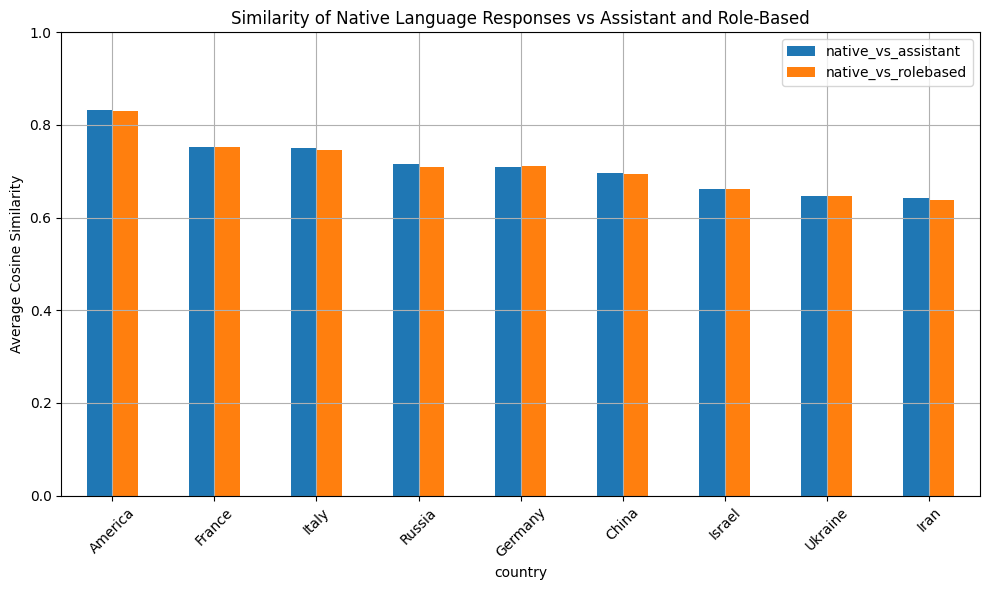

,country,native_vs_assistant,native_vs_rolebased
0,America,0.832532,0.829529
1,France,0.752692,0.751934
2,Italy,0.751127,0.746630
3,Russia,0.715370,0.709433
4,Germany,0.710246,0.712269
5,China,0.696473,0.694846
6,Israel,0.661028,0.662371
7,Ukraine,0.646752,0.647703
8,Iran,0.643459,0.637606


In [ ]:
analyze_native_and_rolebased("/content/drive/MyDrive/bias_summary_native_vs_assisstant_llama.csv",
                             "/content/drive/MyDrive/bias_summary_rolebased_vs_native_llama.csv")

## Compare Role-Based responds to eachother


Do Iran and China respond similarly on a special topics?

Are Germany, France, Italy closely aligned in reasoning?


solution 1 : pairwise cosine similarities and showing them as a heatmap matrix


⚠️ The embeddings produced by llama answers are not all in the same shape, so this function below is changed a bit(w.r.t the same one in gpe version used) to be more safe

In [ ]:
def load_and_average_embeddings(csv_paths: dict, target_dim: int = 384) -> dict:
    country_embeddings = {}

    for country, path in csv_paths.items():
        df = pd.read_csv(path)

        def parse_embedding(e):
            try:
                vec = np.array(eval(e))
                if len(vec) > target_dim:
                    return vec[:target_dim]
                elif len(vec) < target_dim:
                    return np.pad(vec, (0, target_dim - len(vec)))
                else:
                    return vec
            except:
                return None

        df['embedding_vec'] = df['embeddings'].apply(parse_embedding)
        valid_embeddings = df['embedding_vec'].dropna().tolist()

        if not valid_embeddings:
            print(f"⚠️ No valid embeddings for {country}, skipping.")
            continue

        avg_embedding = np.stack(valid_embeddings).mean(axis=0)
        country_embeddings[country] = avg_embedding

    return country_embeddings


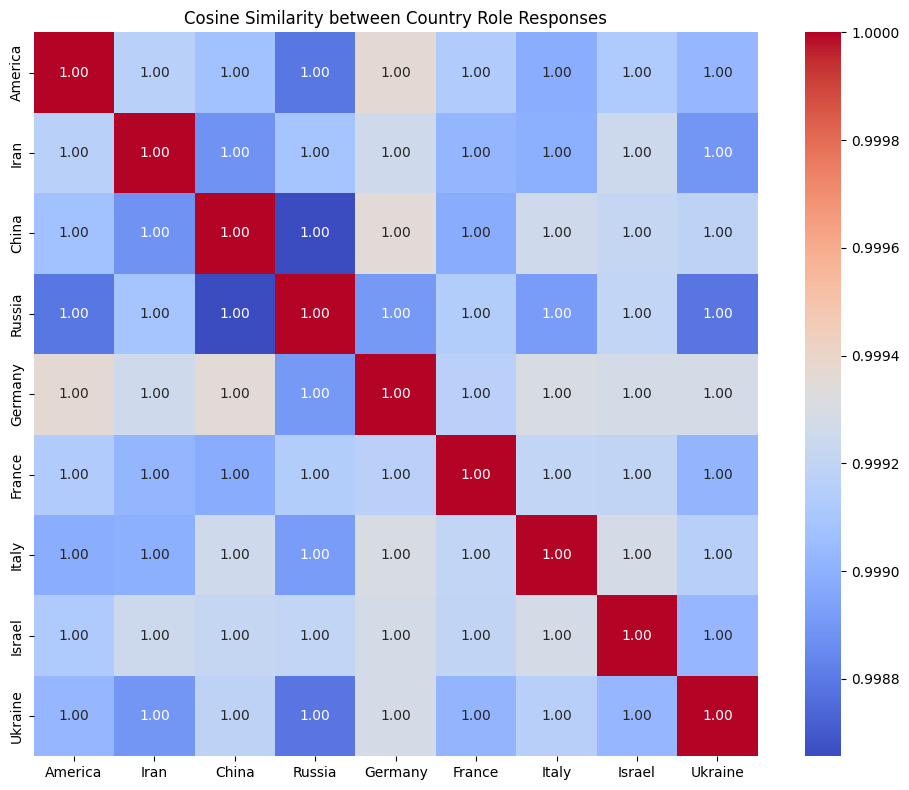

In [ ]:
# rolebaseds to eachother
csv_paths = {
    "America": "/content/drive/MyDrive/America_Llama_answers.csv",
    "Iran": "/content/drive/MyDrive/Iran_Llama_answers.csv",
    "China": "/content/drive/MyDrive/China_Llama_answers.csv",
    "Russia": "/content/drive/MyDrive/Russia_Llama_answers.csv",
    "Germany": "/content/drive/MyDrive/Germany_Llama_answers.csv",
    "France": "/content/drive/MyDrive/France_Llama_answers.csv",
    "Italy": "/content/drive/MyDrive/Italy_Llama_answers.csv",
    "Israel": "/content/drive/MyDrive/Israel_Llama_answers.csv",
    "Ukraine": "/content/drive/MyDrive/Ukraine_Llama_answers.csv"
}

# Load and plot
embedding_dict = load_and_average_embeddings(csv_paths)
plot_similarity_heatmap(embedding_dict, "Cosine Similarity between Country Role Responses")


obsevation:

Extremely High Similarity Across All Roles

The matrix is nearly saturated with red, indicating very little variation in model behavior across roles.



solution 2 :

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def prepare_embeddings_for_projection(csv_paths: dict, label_column: str = "country") -> pd.DataFrame:
    """
    Load embeddings from multiple CSV files and return a DataFrame with all embeddings and labels.

    Parameters:
        csv_paths (dict): Dictionary of label -> file path.
        label_column (str): Column name to store the label (e.g. country or language).

    Returns:
        pd.DataFrame: A DataFrame with columns ['embedding_vec', 'label'].
    """
    all_rows = []

    for label, path in csv_paths.items():
        df = pd.read_csv(path)

        def parse_embedding(e):
            try:
                return np.array(eval(e))
            except:
                return None

        df['embedding_vec'] = df['embeddings'].apply(parse_embedding)
        df = df[df['embedding_vec'].notnull()]
        df[label_column] = label
        all_rows.append(df[['embedding_vec', label_column]])

    return pd.concat(all_rows, ignore_index=True)


def project_and_plot(df: pd.DataFrame, method: str = "pca", label_column: str = "country", title: str = ""):
    """
    Perform dimensionality reduction (PCA or t-SNE) and plot the 2D projection.

    Parameters:
        df (pd.DataFrame): DataFrame with columns 'embedding_vec' and label_column.
        method (str): 'pca' or 'tsne'.
        label_column (str): Column to color-code points by.
        title (str): Plot title.
    """
    X = np.vstack(df['embedding_vec'].values)
    labels = df[label_column].values

    if method == "pca":
        X_proj = PCA(n_components=2).fit_transform(X)
    elif method == "tsne":
        X_proj = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'")

    proj_df = pd.DataFrame(X_proj, columns=["x", "y"])
    proj_df[label_column] = labels

    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=proj_df, x="x", y="y", hue=label_column, palette="tab10", s=70)
    plt.title(title or f"{method.upper()} Projection of Role-Based Embeddings")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


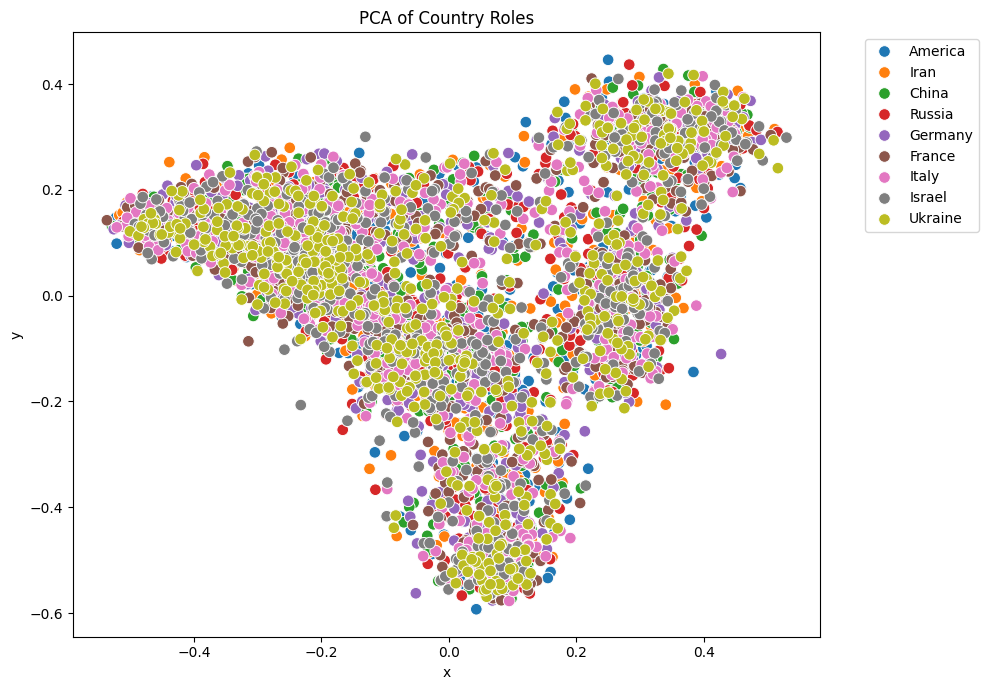

In [ ]:
csv_paths = {
    "America": "/content/drive/MyDrive/America_Llama_answers.csv",
    "Iran": "/content/drive/MyDrive/Iran_Llama_answers.csv",
    "China": "/content/drive/MyDrive/China_Llama_answers.csv",
    "Russia": "/content/drive/MyDrive/Russia_Llama_answers.csv",
    "Germany": "/content/drive/MyDrive/Germany_Llama_answers.csv",
    "France": "/content/drive/MyDrive/France_Llama_answers.csv",
    "Italy": "/content/drive/MyDrive/Italy_Llama_answers.csv",
    "Israel": "/content/drive/MyDrive/Israel_Llama_answers.csv",
    "Ukraine": "/content/drive/MyDrive/Ukraine_Llama_answers.csv"
}
df_all = prepare_embeddings_for_projection(csv_paths)
project_and_plot(df_all, method="pca", label_column="country", title="PCA of Country Roles")

observation:

The LLM generates very similar responses across country roles, at least in the latent space captured by PCA.

change the method from pca to t-sne

t-SNE (t-distributed Stochastic Neighbor Embedding) is one of the most popular techniques for visualizing high-dimensional data, especially in NLP and LLM behavior analysis.

t-SNE reduces high-dimensional data (like 384- or 768-dimensional embeddings) to 2D or 3D, so we can visualize it.

But unlike PCA, which is linear and preserves global variance, t-SNE focuses on preserving local relationships — i.e., nearby points in high-D stay close in low-D.

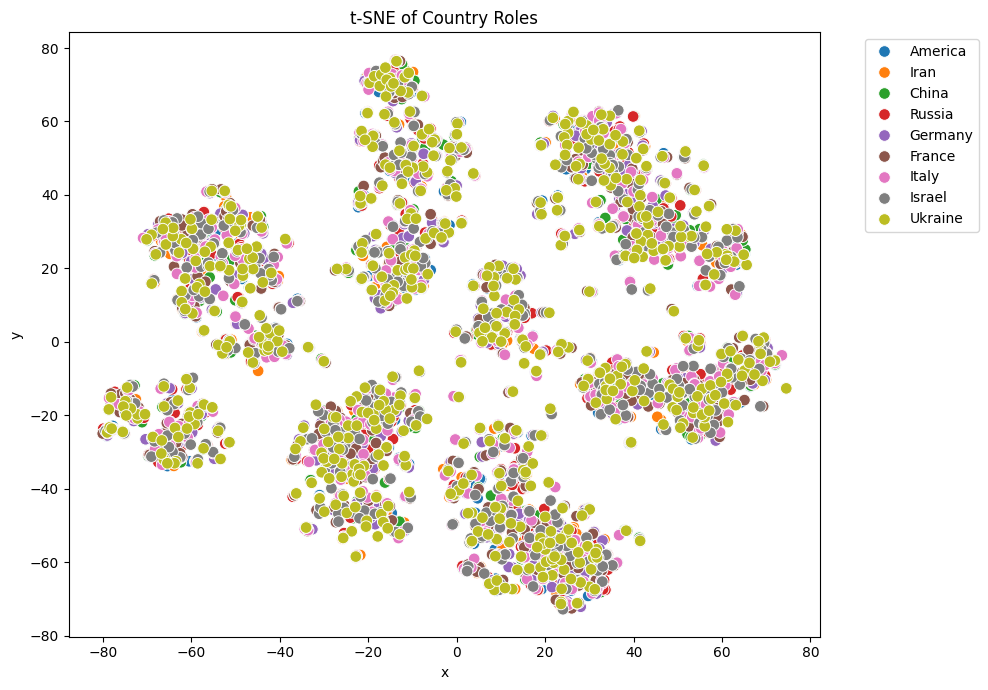

In [ ]:
project_and_plot(df_all, method="tsne", label_column="country", title="t-SNE of Country Roles")

observation:

Well-separated clusters — but not by country
t-SNE shows distinct clusters, which suggests the LLM embeddings contain semantic structure.

But these clusters are not dominated by any one country.

Every cluster contains many different country colors, heavily mixed.

Color by topic instead of country

In [ ]:
def project_and_plot_by_topic(df: pd.DataFrame, method: str = "tsne", title: str = "t-SNE of Topics"):
    """
    Perform dimensionality reduction (PCA or t-SNE) and plot the 2D projection colored by topic.

    Parameters:
        df (pd.DataFrame): DataFrame with columns 'embedding_vec' and 'topic'.
        method (str): 'pca' or 'tsne'.
        title (str): Plot title.
    """
    X = np.vstack(df['embedding_vec'].values)
    labels = df['topic'].values

    if method == "pca":
        X_proj = PCA(n_components=2).fit_transform(X)
    elif method == "tsne":
        X_proj = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'")

    proj_df = pd.DataFrame(X_proj, columns=["x", "y"])
    proj_df["topic"] = labels

    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=proj_df, x="x", y="y", hue="topic", palette="tab10", s=70, legend="full")
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [ ]:
# change this function to have also the topic column
def prepare_embeddings_for_projection(csv_paths: dict, label_column: str = "country") -> pd.DataFrame:
    """
    Load embeddings from multiple CSV files and return a DataFrame with all embeddings, labels, and topic.

    Parameters:
        csv_paths (dict): Dictionary of label -> file path.
        label_column (str): Column name to store the label (e.g. country or language).

    Returns:
        pd.DataFrame: A DataFrame with columns ['embedding_vec', label_column, 'topic'].
    """
    all_rows = []

    for label, path in csv_paths.items():
        df = pd.read_csv(path)

        def parse_embedding(e):
            try:
                return np.array(eval(e))
            except:
                return None

        df['embedding_vec'] = df['embeddings'].apply(parse_embedding)
        df = df[df['embedding_vec'].notnull()]
        df[label_column] = label
        all_rows.append(df[['embedding_vec', label_column, 'topic']])  # include 'topic' here

    return pd.concat(all_rows, ignore_index=True)


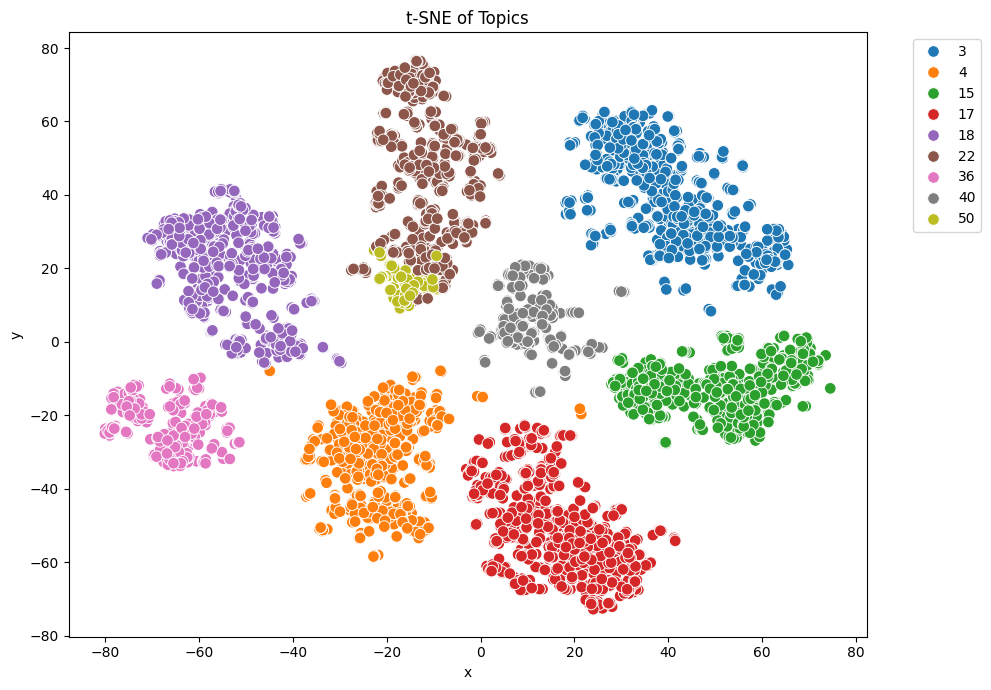

In [ ]:
csv_paths = {
    "America": "/content/drive/MyDrive/America_Llama_answers.csv",
    "Iran": "/content/drive/MyDrive/Iran_Llama_answers.csv",
    "China": "/content/drive/MyDrive/China_Llama_answers.csv",
    "Russia": "/content/drive/MyDrive/Russia_Llama_answers.csv",
    "Germany": "/content/drive/MyDrive/Germany_Llama_answers.csv",
    "France": "/content/drive/MyDrive/France_Llama_answers.csv",
    "Italy": "/content/drive/MyDrive/Italy_Llama_answers.csv",
    "Israel": "/content/drive/MyDrive/Israel_Llama_answers.csv",
    "Ukraine": "/content/drive/MyDrive/Ukraine_Llama_answers.csv"
}
df_all = prepare_embeddings_for_projection(csv_paths)
project_and_plot_by_topic(df_all, method="tsne", title="t-SNE of Topics")

obsevation:
from this plot and the one before we understand that the model is producing responces  very differently depending on the topic rather than the role.

Minor Cluster Merging :
Topic 50 (Church of Scientology) and 22 (Atheism) are slightly closer.

Possibly because both touch on religious themes, so some conceptual overlap.

**Per-topic role clustering**

Run t-SNE within just one topic (e.g., Topic 15: economic sanctions), color by country.
→ Do some countries differ more in certain topics?

In [ ]:
map_topics = [
    (3, "We should fight for the abolition of nuclear weapons", "No nuclear weapons"),
    (4, "We should legalize sex selection", "legalize sex selection"),
    (15, "We should end the use of economic sanctions", "No economic sanctions"),
    (17, "We should legalize prostitution", "legalize prostitution"),
    (18, "We should adopt a multi-party system", "adopt multi-party system"),
    (22, "We should adopt atheism", "adopt atheism"),
    (36, "We should introduce compulsory voting", "compulsory voting"),
    (40, "We should adopt libertarianism", "adopt libertarianism"),
    (50, "We should ban the Church of Scientology", "No Church of Scientology")
]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def project_topic_by_country(df: pd.DataFrame, topic_id: int, method: str = "tsne", title: str = ""):
    """
    Filter the dataframe by a specific topic and project the embeddings in 2D,
    colored by country/role.

    Parameters:
        df (pd.DataFrame): DataFrame with 'embedding_vec', 'topic', and 'country' columns.
        topic_id (int): Topic ID to filter by.
        method (str): 'pca' or 'tsne'.
        title (str): Plot title.
    """
    topic_df = df[df["topic"] == topic_id]
    if topic_df.empty:
        print(f"No data found for topic {topic_id}")
        return

    X = np.vstack(topic_df["embedding_vec"].values)
    labels = topic_df["country"].values

    if method == "pca":
        X_proj = PCA(n_components=2).fit_transform(X)
    elif method == "tsne":
        X_proj = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'")

    proj_df = pd.DataFrame(X_proj, columns=["x", "y"])
    proj_df["country"] = labels

    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=proj_df, x="x", y="y", hue="country", palette="tab10", s=70)
    topic_label = f"Topic {topic_id}" if not title else title
    plt.title(f"{method.upper()} of {topic_label} by Country")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


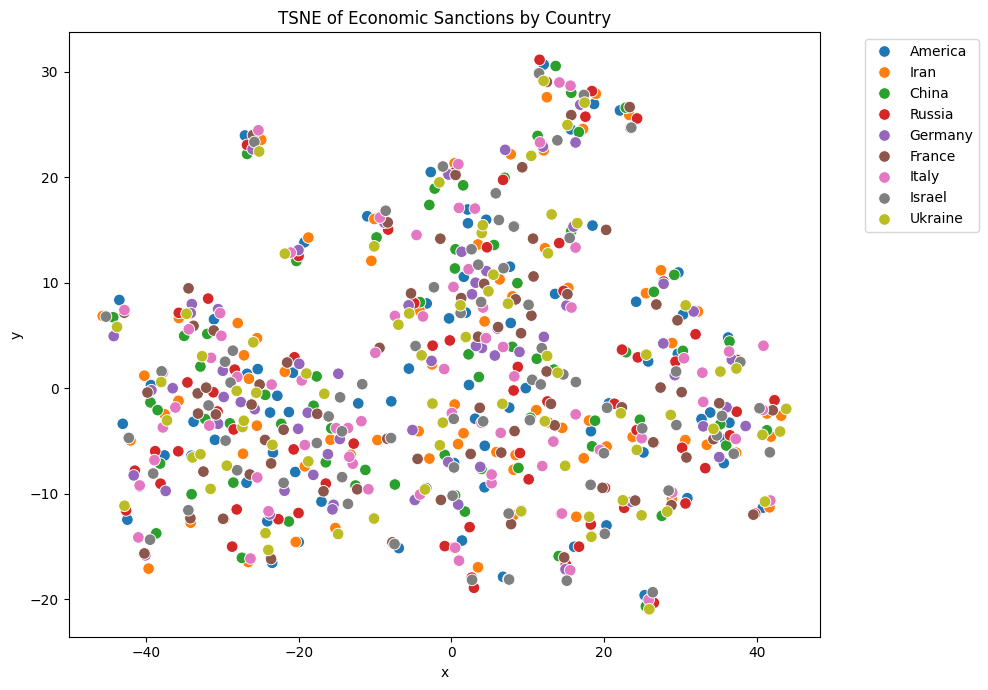

In [ ]:
project_topic_by_country(df_all, topic_id=15, method="tsne", title="Economic Sanctions")

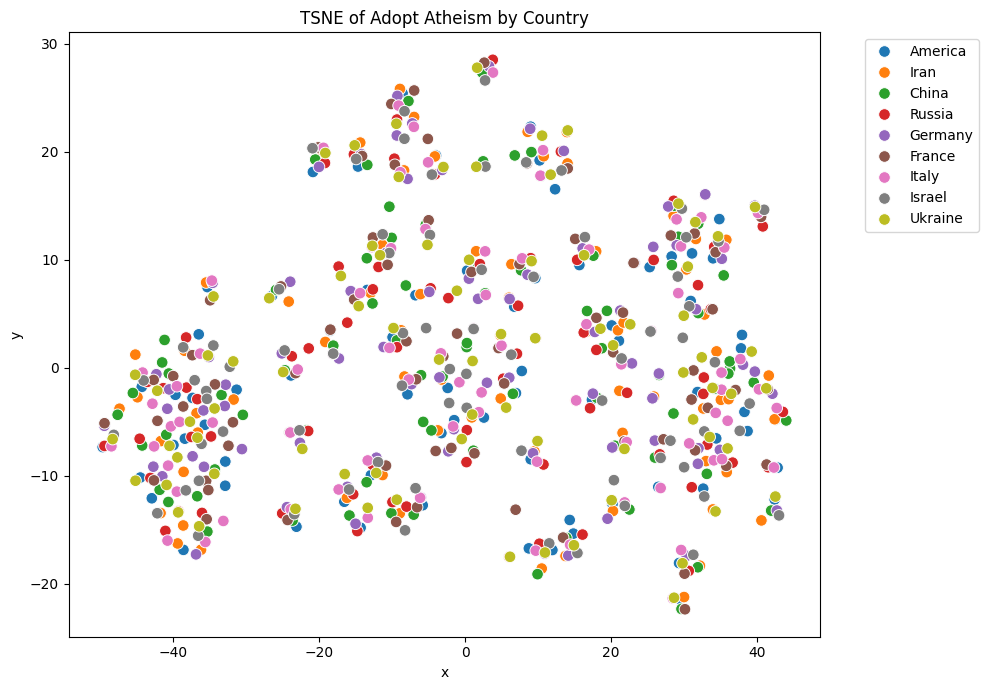

In [ ]:
project_topic_by_country(df_all, topic_id=22, method="tsne", title="Adopt Atheism")

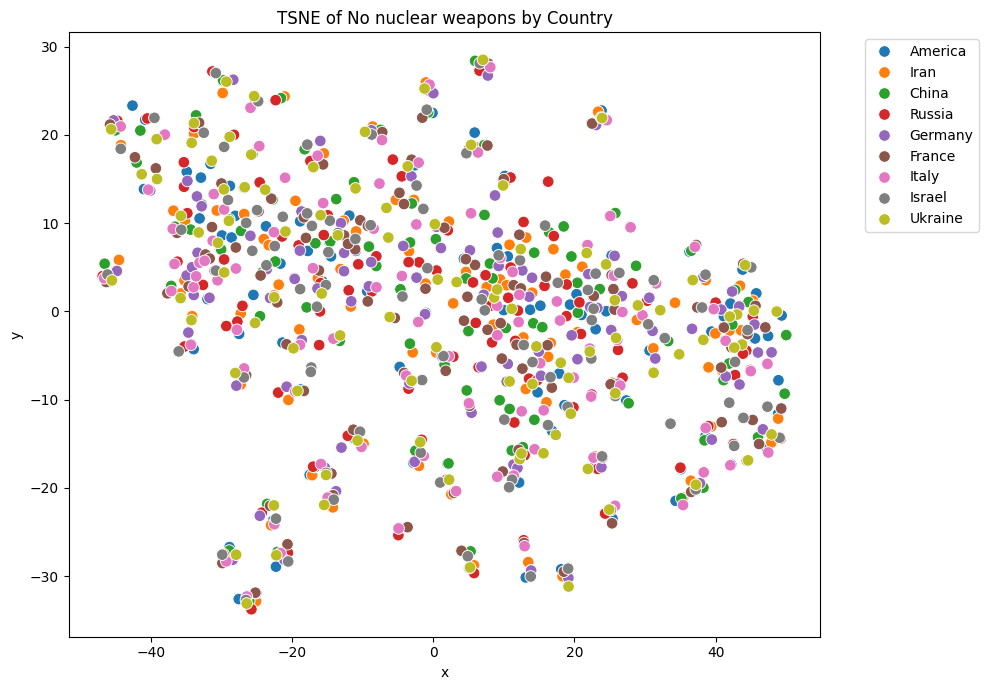

In [ ]:
project_topic_by_country(df_all, topic_id=3, method="tsne", title="No nuclear weapons")

observation:
No specific clustring for this also

Strong Mixing Across Countries
The points for all countries are highly intermixed.

No country forms a distinct cluster or subregion in the embedding space